<a href="https://colab.research.google.com/github/MatheusrCunha/processamento_imagem/blob/main/histograma_binarizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SANTA CATARINA \
CAMPUS FLORIANÓPOLIS \
DEPARTAMENTO ACADÊMICO DE ELETRÔNICA \
ENGENHARIA ELETRÔNICA

Estudante:Matheus Rodrigues da Cunha

# Atividade: Histograma e Binarização de Imagens

Existem diversos módulos de processamento de imagens para Python, como Pillow, OpenCV-Python, SimpleITK. Para esta atividade, se recomendo o _scikit-image_ e o OpenCV (exercício 7). A seguir um exemplo de como abrir uma imagem e gerar o histograma.

## Trabalhando com imagens pré-gravadas no computador
Aqui, você irá abrir uma imagem que está no disco, usando `skimage.io.imread`

In [2]:
!pip install imshowpair
import imshowpair

from skimage import io, exposure, filters
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

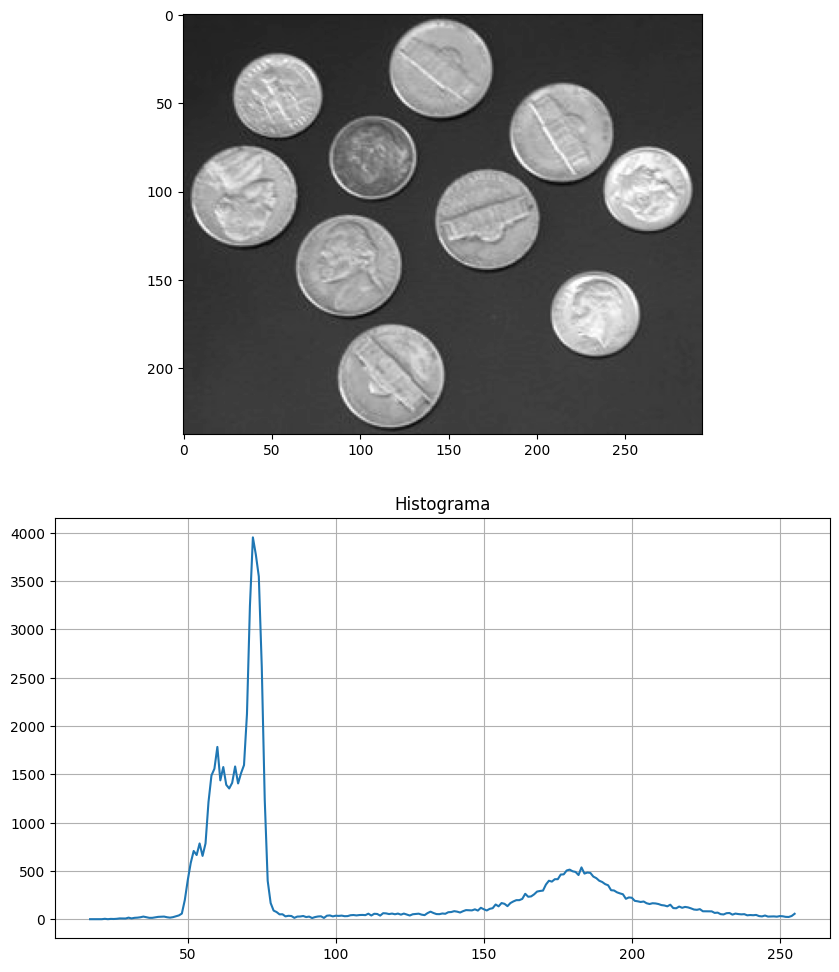

In [4]:
fingerprint = io.imread('coins.jpg')
hist_y, hist_x = exposure.histogram(fingerprint)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(fingerprint, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

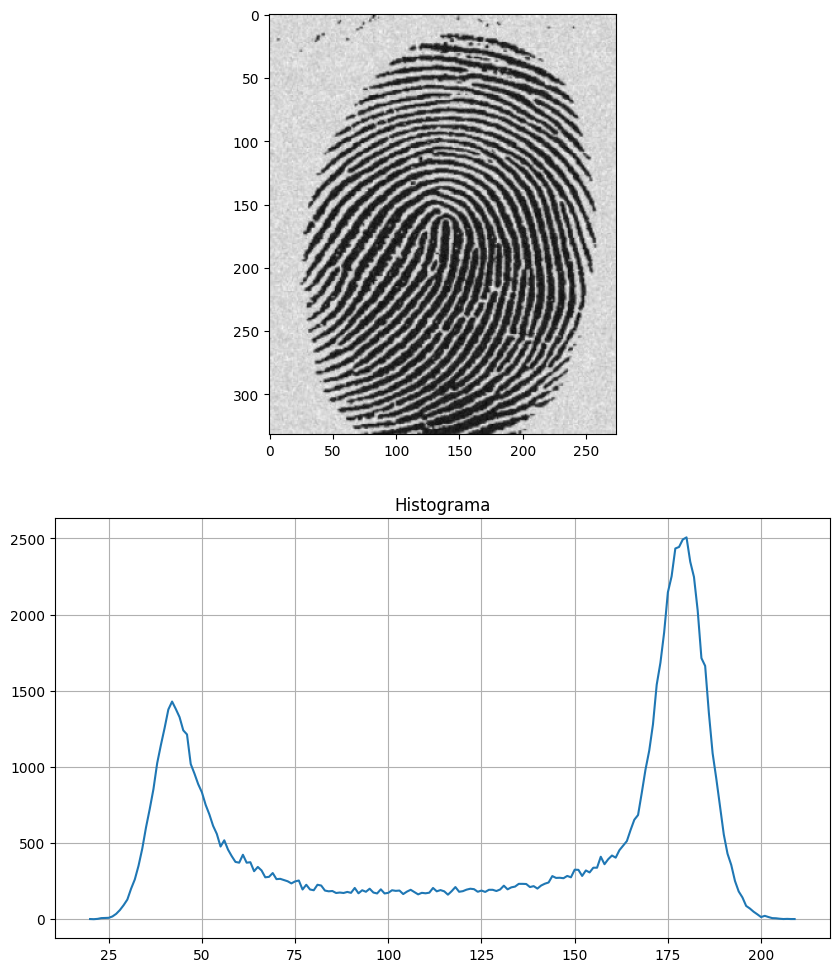

In [5]:
image1 = io.imread('http://fmwconcepts.com/imagemagick/otsuthresh/images/fingerprint.jpg')
hist_y, hist_x = exposure.histogram(image1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(image1, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

R: Sim, é possível ver os dois picos.

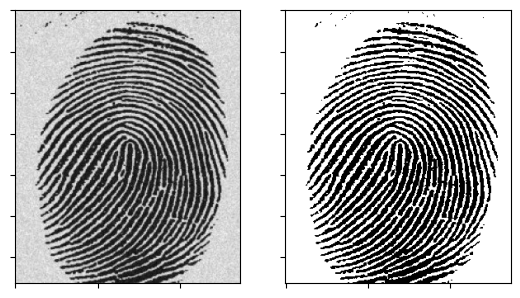

In [6]:
image1 = io.imread('http://fmwconcepts.com/imagemagick/otsuthresh/images/fingerprint.jpg')
image2 = image1 > 100
imshowpair.imshowpair(image1, image2, cmap=plt.cm.gray)
plt.show()

R: Um valor entre 75 e 150

Nos itens seguintes, quando solicitado a mostrar a imagem resultante, use `imshowpair` [1] para mostrá-la lado a lado com a imagem original.

### Histograma

1. Compute o histograma da imagem _fingerprint_ [2] e apresente.

2. Na imagem _fingerprint_ [2], é possível distinguir o fundo e a impressão digital observando o histograma?

### Binarização

3. Qual limite poderia ser usado para binarizar a imagem *fingerprint*? Observe e apresente o histograma, teste e mostre a imagem binarizada resultante lado a lado com a imagem original usando `imshowpair`.

4. De forma semelhante, que limite poderia ser usado para binarizar a imagem _son1_ ou _darkerforeground_ [3]? Mostre o resultado.

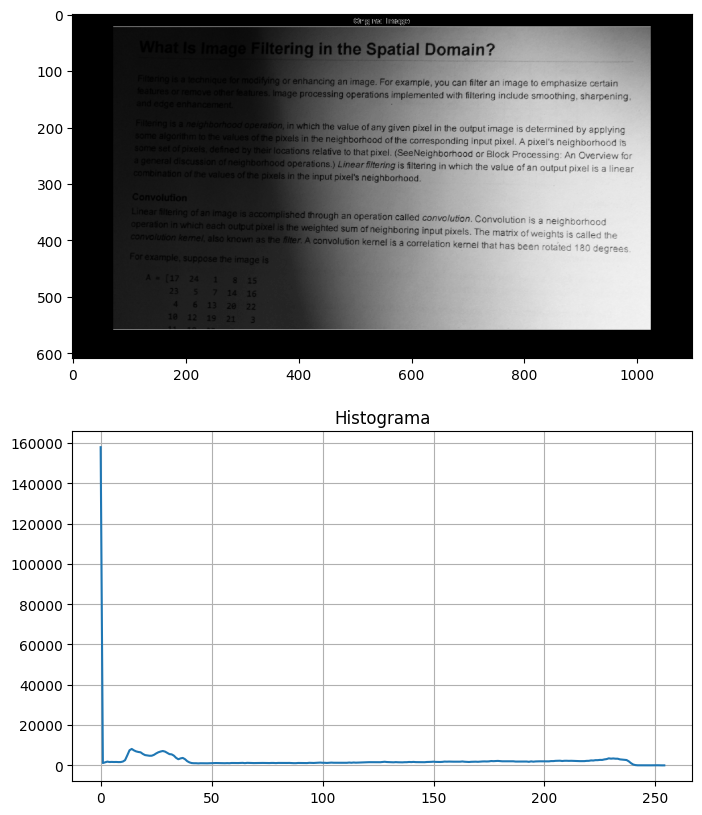

In [8]:
imageteste = (io.imread('https://www.mathworks.com/help/examples/images/win64/BinarizeImagesWithDarkerForegroundThanBackgroundExample_01.png',as_gray=True)*256).astype(np.uint8)
hist_y, hist_x = exposure.histogram(imageteste)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
ax1.imshow(imageteste, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

R: Um valor maior que 25

5. Verifique que a binarização global da imagem _son1_ ou _darkerforeground_ [3] não provê um bom resultado. Use um limiar adaptativo (`threshold_local` no módulo _Scikit Image_ a partir da versão 0.13) [4] e mostre o resultado.

R: A recuperação da imagem foi muito boa.

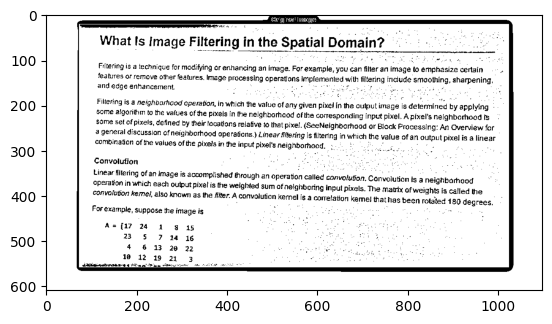

In [9]:
imaget = (io.imread('https://www.mathworks.com/help/examples/images/win64/BinarizeImagesWithDarkerForegroundThanBackgroundExample_01.png',as_gray=True)*256).astype(np.uint8)
local_thresh = filters.threshold_local(imaget, block_size=29, offset=4)  # Adjust offset as needed
image2 = imaget > local_thresh

plt.imshow(image2,cmap=plt.cm.gray)
plt.show()

6. Observe o histograma da imagem _pout_ [5]. O que você pode concluir?

R: A imagem praticamente não possui ponto de brilho acima de 170.

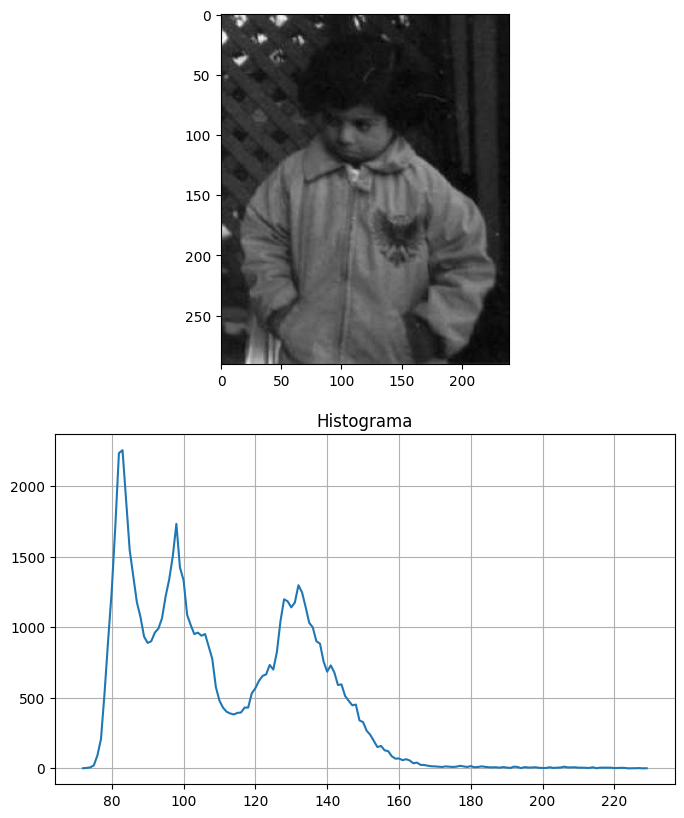

In [10]:
image1 = io.imread('https://www.johnloomis.org/ece563/notes/enhancement/scale/pout.jpg')
hist_y, hist_x = exposure.histogram(image1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
ax1.imshow(image1, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

7. Agora, a partir da imagem `gray`, use a função `cv.threshold` ou `cv.adaptiveThreshold` [6] para binarizar a imagem. Apresente o código e imagens resultantes.


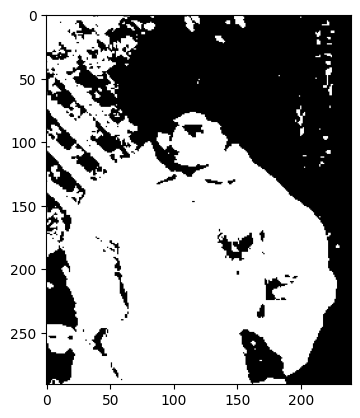

In [11]:
image1 = io.imread('https://www.johnloomis.org/ece563/notes/enhancement/scale/pout.jpg')
ret, image2 = cv.threshold(image1, 100, np.max(image1), cv.THRESH_BINARY)

plt.imshow(image2,cmap=plt.cm.gray)
plt.show()

### Equalização de histograma

8. Compare as técnicas de equalização de histograma implementadas nas funções `rescale_intensity`, `equalize_hist` e `equalize_adapthist` do _Scikit Image_ [7], usando a imagem _pout_ [5] como teste. Pesquise as referências apresentadas na documentação de cada uma das funções e explique as diferenças entre elas.

9. De forma semelhante, aplique uma das técnicas de equalização de histograma para realçar a imagem _dentalradiograph_ [8].

## Referências
[1] https://pypi.org/project/imshowpair/

[2] http://fmwconcepts.com/imagemagick/otsuthresh/images/fingerprint.jpg

[3] http://homepages.inf.ed.ac.uk/rbf/HIPR2/images/son1.gif ou https://www.mathworks.com/help/examples/images/win64/BinarizeImagesWithDarkerForegroundThanBackgroundExample_01.png

[4] https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding_guide.html#sphx-glr-auto-examples-applications-plot-thresholding-guide-py

[5] http://www.johnloomis.org/ece563/notes/enhancement/scale/pout.jpg

[6] https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

[7] https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

[8] https://imagej.net/images/DentalRadiograph.png

[9] http://www.mathworks.com/help/releases/R2016b/examples/images/CompareResultsOfAveragingFilterAndMedianFilterExample_02.png


## Bibliografia
https://opensource.com/article/19/3/python-image-manipulation-tools

https://www.mathworks.com/examples/image/mw/images-ex28564424-create-image-histogram

https://www.mathworks.com/examples/image/mw/images-ex57959084-basic-image-enhancement-and-analysis-techniques

http://www.mathworks.com/help/images/ref/imbinarize.html

http://blogs.mathworks.com/steve/2016/06/14/image-binarization-otsus-method

https://www.mathworks.com/examples/image/mw/images-ex97343802-contrast-enhancement-techniques

https://www.mathworks.com/examples/image/mw/images-ex74217292-remove-noise-using-an-averaging-filter-and-a-median-filter

https://www.mathworks.com/examples/image/mw/images-ex48835658-detect-edges-in-images

https://www.mathworks.com/examples/image/mw/images-ex80028725-trace-boundaries-of-objects-in-images

https://www.mathworks.com/examples/image/mw/images-ex45754758-filter-images-using-predefined-filters

https://www.mathworks.com/examples/image/community/18507-missing-planes

https://how2electronics.com/color-detection-tracking-with-esp32-cam-opencv/

In [13]:
!wget -O make.py https://raw.githubusercontent.com/MatheusrCunha/ColabMakePDF/master/make.py
import make; make.pdf()

--2024-08-15 11:26:41--  https://raw.githubusercontent.com/MatheusrCunha/ColabMakePDF/master/make.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-08-15 11:26:41 ERROR 404: Not Found.

Downloading...
From: https://drive.google.com/uc?id=1KQLM8GqJCPsRyCkg-UTA4Gojs9IIkIXa
To: /content/histograma_binarizacao.ipynb
100% 1.49M/1.49M [00:00<00:00, 130MB/s]
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>